In [20]:
from Bio.PDB.PDBParser import PDBParser
import nglview as nv
import ipywidgets

In [21]:
pdb_parser = PDBParser(PERMISSIVE=1)

In [22]:
structure = pdb_parser.get_structure("covid-19", "7jwy.pdb")

/home/varun/miniconda3/envs/bioinformatics/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 27249.
  PDBConstructionWarning)
/home/varun/miniconda3/envs/bioinformatics/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 27403.
  PDBConstructionWarning)
/home/varun/miniconda3/envs/bioinformatics/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 27529.
  PDBConstructionWarning)
/home/varun/miniconda3/envs/bioinformatics/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 27669.
  PDBConstructionWarning)
/home/varun/miniconda3/envs/bioinformatics/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 27709.
  PDBConstructio

In [23]:
nv.demo()

NGLWidget()

In [24]:
from Bio import PDB

repository = PDB.PDBList()

In [25]:
repository.retrieve_pdb_file('6LZE',pdir='.', file_format='pdb')

Structure exists: './pdb6lze.ent' 


'./pdb6lze.ent'

In [26]:
parser = PDB.PDBParser()
c19_6LZE = parser.get_structure('main protease with inhibitor 11a', 'pdb6lze.ent')

In [27]:
def print_pdb_headers(headers, indent=0):
    ind_text = ' ' * indent
    for header, content in headers.items():
        if type(content) == dict:
            print('\n%s%20s:' % (ind_text, header))
            print_pdb_headers(content, indent + 4)
            print()
        elif type(content) == list:
            print('%s%20s:' % (ind_text, header))
            for elem in content:
                print('%s%21s %s' % (ind_text, '->', elem))
        else:
            print('%s%20s: %s' % (ind_text, header, content))

In [28]:
print_pdb_headers(c19_6LZE.header)

                name:  the crystal structure of covid-19 main protease in complex with an inhibitor 11a
                head: viral protein
     deposition_date: 2020-02-19
        release_date: 2020-04-29
    structure_method: x-ray diffraction
          resolution: 1.51
 structure_reference:
   journal_reference: w.dai,b.zhang,x.m.jiang,h.su,j.li,y.zhao,x.xie,z.jin,f.liu,c.li,y.li,f.bai,h.wang,x.cheng,x.cen,s.hu,x.yanj.wang,x.liu,g.xiao,h.jiang,z.rao,l.k.zhang,y.xu,h.yah.liu structure-based design of antiviral drug candidates targeting the sars-cov-2 main protease. science v. 368 1331 2020 essn 1095-9203 32321856 10.1126/science.abb4489 
              author: B.Zhang,Y.Zhang,Z.Jing,X.Liu,H.Yang,H.Liu,Z.Rao,H.Jiang

            compound:

                       1:
                        misc: 
                    molecule: 3c-like proteinase
                       chain: a
                     synonym: pp1ab,orf1ab polyprotein,3cl-pro,3clp,main protease,mpro,non-structural protein 5,

In [29]:
c19_6LZE.header['compound']

{'1': {'misc': '',
  'molecule': '3c-like proteinase',
  'chain': 'a',
  'synonym': 'pp1ab,orf1ab polyprotein,3cl-pro,3clp,main protease,mpro,non-structural protein 5,nsp5,sars coronavirus main proteinase, replicase polyprotein 1ab ',
  'ec_number': '3.4.22.69',
  'ec': '3.4.22.69',
  'engineered': 'yes'}}

In [30]:
for model in c19_6LZE:
    for chain in model:
        print(f'covid-19: {chain.id}\t Number of Residues: {len(chain)}\t Number of atoms: {len(list(chain.get_atoms()))}')

covid-19: A	 Number of Residues: 517	 Number of atoms: 2598


In [31]:
for residue in c19_6LZE.get_residues():
    if residue.id[0] in ['', 'W']:
        continue
print(residue.id)

('W', 709, ' ')


#### The stuff you see below is a structure object

Structure model works like this:  


STRUCTURE OBJECT, MODEL, CHAIN, Residue, Atom

residue is the unique part of the structure/

In [32]:
res = next(c19_6LZE[0]['A'].get_residues())
print(res)
for atom in res:
    print(atom, atom.serial_number, atom.element)
c19_6LZE[0]['A'][1]['CA'] #MODEL, CHAIN, RESIDUE, AND ATOM

<Residue SER het=  resseq=1 icode= >
<Atom N> 1 N
<Atom CA> 2 C
<Atom C> 3 C
<Atom O> 4 O
<Atom CB> 5 C
<Atom OG> 6 O


<Atom CA>

In [33]:
from Bio.SeqIO import PdbIO, FastaIO

In [34]:
from Bio.SeqIO import PdbIO, FastaIO

# export residue as fasta file
def get_fasta(pdb_file, fasta_file, transfer_ids=None):
    fasta_writer = FastaIO.FastaWriter(fasta_file)
    fasta_writer.write_header()
    for rec in PdbIO.PdbSeqresIterator(pdb_file):
        if len(rec.seq) == 0:
            continue
        if transfer_ids is not None and rec.id not in transfer_ids:
            continue
        print(rec.id, rec.seq, len(rec.seq))
        fasta_writer.write_record(rec)

In [35]:
get_fasta(open('pdb6lze.ent'), open('6lze.fasta', 'w'), transfer_ids=['6LZE:B'])

In [36]:
c19_6LZE.get_atoms()

<generator object Structure.get_atoms at 0x7fe21c51c888>

In [42]:
from collections import defaultdict

atom_cnt = defaultdict(int)
atom_chain = defaultdict(int)
atom_res_types = defaultdict(int)

for atom in c19_6LZE.get_atoms():
    my_residue = atom.parent
    my_chain = my_residue.parent
    atom_chain[my_chain.id] += 1
    if my_residue.resname != 'HOH':
        atom_cnt[atom.element] += 1
    atom_res_types[my_residue.resname] += 1
    print("Atom Res Types")
    print(dict(atom_res_types))
    print("Atom Chain")
    print(dict(atom_chain))
    print("Atom count")
    print(dict(atom_cnt))
    

Atom Res Types
{'SER': 1}
Atom Chain
{'A': 1}
Atom count
{'N': 1}
Atom Res Types
{'SER': 2}
Atom Chain
{'A': 2}
Atom count
{'N': 1, 'C': 1}
Atom Res Types
{'SER': 3}
Atom Chain
{'A': 3}
Atom count
{'N': 1, 'C': 2}
Atom Res Types
{'SER': 4}
Atom Chain
{'A': 4}
Atom count
{'N': 1, 'C': 2, 'O': 1}
Atom Res Types
{'SER': 5}
Atom Chain
{'A': 5}
Atom count
{'N': 1, 'C': 3, 'O': 1}
Atom Res Types
{'SER': 6}
Atom Chain
{'A': 6}
Atom count
{'N': 1, 'C': 3, 'O': 2}
Atom Res Types
{'SER': 6, 'GLY': 1}
Atom Chain
{'A': 7}
Atom count
{'N': 2, 'C': 3, 'O': 2}
Atom Res Types
{'SER': 6, 'GLY': 2}
Atom Chain
{'A': 8}
Atom count
{'N': 2, 'C': 4, 'O': 2}
Atom Res Types
{'SER': 6, 'GLY': 3}
Atom Chain
{'A': 9}
Atom count
{'N': 2, 'C': 5, 'O': 2}
Atom Res Types
{'SER': 6, 'GLY': 4}
Atom Chain
{'A': 10}
Atom count
{'N': 2, 'C': 5, 'O': 3}
Atom Res Types
{'SER': 6, 'GLY': 4, 'PHE': 1}
Atom Chain
{'A': 11}
Atom count
{'N': 3, 'C': 5, 'O': 3}
Atom Res Types
{'SER': 6, 'GLY': 4, 'PHE': 2}
Atom Chain
{'A': 12}
A

{'N': 61, 'C': 223, 'O': 66, 'S': 6}
Atom Res Types
{'SER': 18, 'GLY': 20, 'PHE': 22, 'ARG': 22, 'LYS': 18, 'MET': 16, 'ALA': 5, 'PRO': 14, 'VAL': 42, 'GLU': 18, 'CYS': 24, 'GLN': 9, 'THR': 35, 'LEU': 24, 'ASN': 8, 'TRP': 14, 'ASP': 18, 'TYR': 12, 'HIS': 10, 'ILE': 8}
Atom Chain
{'A': 357}
Atom count
{'N': 61, 'C': 224, 'O': 66, 'S': 6}
Atom Res Types
{'SER': 18, 'GLY': 20, 'PHE': 22, 'ARG': 22, 'LYS': 18, 'MET': 16, 'ALA': 5, 'PRO': 14, 'VAL': 42, 'GLU': 18, 'CYS': 24, 'GLN': 9, 'THR': 35, 'LEU': 24, 'ASN': 8, 'TRP': 14, 'ASP': 19, 'TYR': 12, 'HIS': 10, 'ILE': 8}
Atom Chain
{'A': 358}
Atom count
{'N': 61, 'C': 225, 'O': 66, 'S': 6}
Atom Res Types
{'SER': 18, 'GLY': 20, 'PHE': 22, 'ARG': 22, 'LYS': 18, 'MET': 16, 'ALA': 5, 'PRO': 14, 'VAL': 42, 'GLU': 18, 'CYS': 24, 'GLN': 9, 'THR': 35, 'LEU': 24, 'ASN': 8, 'TRP': 14, 'ASP': 20, 'TYR': 12, 'HIS': 10, 'ILE': 8}
Atom Chain
{'A': 359}
Atom count
{'N': 61, 'C': 225, 'O': 67, 'S': 6}
Atom Res Types
{'SER': 18, 'GLY': 20, 'PHE': 22, 'ARG': 2

Atom count
{'N': 126, 'C': 442, 'O': 128, 'S': 9}
Atom Res Types
{'SER': 30, 'GLY': 28, 'PHE': 33, 'ARG': 44, 'LYS': 45, 'MET': 32, 'ALA': 10, 'PRO': 21, 'VAL': 75, 'GLU': 27, 'CYS': 30, 'GLN': 36, 'THR': 35, 'LEU': 80, 'ASN': 56, 'TRP': 14, 'ASP': 32, 'TYR': 24, 'HIS': 30, 'ILE': 24}
Atom Chain
{'A': 706}
Atom count
{'N': 126, 'C': 443, 'O': 128, 'S': 9}
Atom Res Types
{'SER': 30, 'GLY': 28, 'PHE': 33, 'ARG': 44, 'LYS': 45, 'MET': 32, 'ALA': 10, 'PRO': 21, 'VAL': 76, 'GLU': 27, 'CYS': 30, 'GLN': 36, 'THR': 35, 'LEU': 80, 'ASN': 56, 'TRP': 14, 'ASP': 32, 'TYR': 24, 'HIS': 30, 'ILE': 24}
Atom Chain
{'A': 707}
Atom count
{'N': 126, 'C': 444, 'O': 128, 'S': 9}
Atom Res Types
{'SER': 30, 'GLY': 28, 'PHE': 33, 'ARG': 44, 'LYS': 45, 'MET': 32, 'ALA': 10, 'PRO': 21, 'VAL': 77, 'GLU': 27, 'CYS': 30, 'GLN': 36, 'THR': 35, 'LEU': 80, 'ASN': 56, 'TRP': 14, 'ASP': 32, 'TYR': 24, 'HIS': 30, 'ILE': 24}
Atom Chain
{'A': 708}
Atom count
{'N': 126, 'C': 445, 'O': 128, 'S': 9}
Atom Res Types
{'SER': 30,

Atom Chain
{'A': 1060}
Atom count
{'N': 187, 'C': 670, 'O': 191, 'S': 12}
Atom Res Types
{'SER': 48, 'GLY': 40, 'PHE': 66, 'ARG': 66, 'LYS': 75, 'MET': 40, 'ALA': 25, 'PRO': 56, 'VAL': 98, 'GLU': 27, 'CYS': 42, 'GLN': 63, 'THR': 63, 'LEU': 88, 'ASN': 80, 'TRP': 14, 'ASP': 40, 'TYR': 60, 'HIS': 30, 'ILE': 40}
Atom Chain
{'A': 1061}
Atom count
{'N': 187, 'C': 671, 'O': 191, 'S': 12}
Atom Res Types
{'SER': 48, 'GLY': 40, 'PHE': 66, 'ARG': 66, 'LYS': 76, 'MET': 40, 'ALA': 25, 'PRO': 56, 'VAL': 98, 'GLU': 27, 'CYS': 42, 'GLN': 63, 'THR': 63, 'LEU': 88, 'ASN': 80, 'TRP': 14, 'ASP': 40, 'TYR': 60, 'HIS': 30, 'ILE': 40}
Atom Chain
{'A': 1062}
Atom count
{'N': 187, 'C': 671, 'O': 192, 'S': 12}
Atom Res Types
{'SER': 48, 'GLY': 40, 'PHE': 66, 'ARG': 66, 'LYS': 77, 'MET': 40, 'ALA': 25, 'PRO': 56, 'VAL': 98, 'GLU': 27, 'CYS': 42, 'GLN': 63, 'THR': 63, 'LEU': 88, 'ASN': 80, 'TRP': 14, 'ASP': 40, 'TYR': 60, 'HIS': 30, 'ILE': 40}
Atom Chain
{'A': 1063}
Atom count
{'N': 187, 'C': 672, 'O': 192, 'S': 

{'A': 1409}
Atom count
{'N': 243, 'C': 890, 'O': 259, 'S': 17}
Atom Res Types
{'SER': 72, 'GLY': 70, 'PHE': 110, 'ARG': 66, 'LYS': 81, 'MET': 56, 'ALA': 30, 'PRO': 63, 'VAL': 119, 'GLU': 45, 'CYS': 60, 'GLN': 63, 'THR': 77, 'LEU': 112, 'ASN': 104, 'TRP': 14, 'ASP': 64, 'TYR': 96, 'HIS': 60, 'ILE': 48}
Atom Chain
{'A': 1410}
Atom count
{'N': 243, 'C': 891, 'O': 259, 'S': 17}
Atom Res Types
{'SER': 72, 'GLY': 71, 'PHE': 110, 'ARG': 66, 'LYS': 81, 'MET': 56, 'ALA': 30, 'PRO': 63, 'VAL': 119, 'GLU': 45, 'CYS': 60, 'GLN': 63, 'THR': 77, 'LEU': 112, 'ASN': 104, 'TRP': 14, 'ASP': 64, 'TYR': 96, 'HIS': 60, 'ILE': 48}
Atom Chain
{'A': 1411}
Atom count
{'N': 243, 'C': 892, 'O': 259, 'S': 17}
Atom Res Types
{'SER': 72, 'GLY': 72, 'PHE': 110, 'ARG': 66, 'LYS': 81, 'MET': 56, 'ALA': 30, 'PRO': 63, 'VAL': 119, 'GLU': 45, 'CYS': 60, 'GLN': 63, 'THR': 77, 'LEU': 112, 'ASN': 104, 'TRP': 14, 'ASP': 64, 'TYR': 96, 'HIS': 60, 'ILE': 48}
Atom Chain
{'A': 1412}
Atom count
{'N': 243, 'C': 892, 'O': 260, 'S':

Atom count
{'N': 303, 'C': 1113, 'O': 323, 'S': 17}
Atom Res Types
{'SER': 72, 'GLY': 80, 'PHE': 143, 'ARG': 99, 'LYS': 81, 'MET': 56, 'ALA': 60, 'PRO': 70, 'VAL': 147, 'GLU': 45, 'CYS': 60, 'GLN': 81, 'THR': 133, 'LEU': 140, 'ASN': 128, 'TRP': 42, 'ASP': 88, 'TYR': 108, 'HIS': 60, 'ILE': 64}
Atom Chain
{'A': 1757}
Atom count
{'N': 303, 'C': 1113, 'O': 324, 'S': 17}
Atom Res Types
{'SER': 72, 'GLY': 80, 'PHE': 143, 'ARG': 99, 'LYS': 81, 'MET': 56, 'ALA': 60, 'PRO': 70, 'VAL': 147, 'GLU': 45, 'CYS': 60, 'GLN': 81, 'THR': 133, 'LEU': 141, 'ASN': 128, 'TRP': 42, 'ASP': 88, 'TYR': 108, 'HIS': 60, 'ILE': 64}
Atom Chain
{'A': 1758}
Atom count
{'N': 303, 'C': 1114, 'O': 324, 'S': 17}
Atom Res Types
{'SER': 72, 'GLY': 80, 'PHE': 143, 'ARG': 99, 'LYS': 81, 'MET': 56, 'ALA': 60, 'PRO': 70, 'VAL': 147, 'GLU': 45, 'CYS': 60, 'GLN': 81, 'THR': 133, 'LEU': 142, 'ASN': 128, 'TRP': 42, 'ASP': 88, 'TYR': 108, 'HIS': 60, 'ILE': 64}
Atom Chain
{'A': 1759}
Atom count
{'N': 303, 'C': 1115, 'O': 324, 'S': 1

Atom Chain
{'A': 2093}
Atom count
{'N': 356, 'C': 1327, 'O': 390, 'S': 20}
Atom Res Types
{'SER': 84, 'GLY': 88, 'PHE': 154, 'ARG': 99, 'LYS': 99, 'MET': 72, 'ALA': 80, 'PRO': 84, 'VAL': 168, 'GLU': 63, 'CYS': 66, 'GLN': 99, 'THR': 147, 'LEU': 195, 'ASN': 152, 'TRP': 42, 'ASP': 120, 'TYR': 132, 'HIS': 70, 'ILE': 80}
Atom Chain
{'A': 2094}
Atom count
{'N': 356, 'C': 1328, 'O': 390, 'S': 20}
Atom Res Types
{'SER': 84, 'GLY': 88, 'PHE': 154, 'ARG': 99, 'LYS': 99, 'MET': 72, 'ALA': 80, 'PRO': 84, 'VAL': 168, 'GLU': 63, 'CYS': 66, 'GLN': 99, 'THR': 147, 'LEU': 196, 'ASN': 152, 'TRP': 42, 'ASP': 120, 'TYR': 132, 'HIS': 70, 'ILE': 80}
Atom Chain
{'A': 2095}
Atom count
{'N': 356, 'C': 1328, 'O': 391, 'S': 20}
Atom Res Types
{'SER': 84, 'GLY': 88, 'PHE': 154, 'ARG': 99, 'LYS': 99, 'MET': 72, 'ALA': 80, 'PRO': 84, 'VAL': 168, 'GLU': 63, 'CYS': 66, 'GLN': 99, 'THR': 147, 'LEU': 197, 'ASN': 152, 'TRP': 42, 'ASP': 120, 'TYR': 132, 'HIS': 70, 'ILE': 80}
Atom Chain
{'A': 2096}
Atom count
{'N': 356, '

Atom count
{'N': 402, 'C': 1514, 'O': 447, 'S': 26}
Atom Res Types
{'SER': 96, 'GLY': 104, 'PHE': 176, 'ARG': 121, 'LYS': 99, 'MET': 80, 'ALA': 85, 'PRO': 91, 'VAL': 189, 'GLU': 81, 'CYS': 72, 'GLN': 117, 'THR': 161, 'LEU': 232, 'ASN': 168, 'TRP': 42, 'ASP': 136, 'TYR': 132, 'HIS': 70, 'ILE': 88, 'DMS': 16, 'FHR': 33, 'HOH': 63}
Atom Chain
{'A': 2452}
Atom count
{'N': 402, 'C': 1514, 'O': 447, 'S': 26}
Atom Res Types
{'SER': 96, 'GLY': 104, 'PHE': 176, 'ARG': 121, 'LYS': 99, 'MET': 80, 'ALA': 85, 'PRO': 91, 'VAL': 189, 'GLU': 81, 'CYS': 72, 'GLN': 117, 'THR': 161, 'LEU': 232, 'ASN': 168, 'TRP': 42, 'ASP': 136, 'TYR': 132, 'HIS': 70, 'ILE': 88, 'DMS': 16, 'FHR': 33, 'HOH': 64}
Atom Chain
{'A': 2453}
Atom count
{'N': 402, 'C': 1514, 'O': 447, 'S': 26}
Atom Res Types
{'SER': 96, 'GLY': 104, 'PHE': 176, 'ARG': 121, 'LYS': 99, 'MET': 80, 'ALA': 85, 'PRO': 91, 'VAL': 189, 'GLU': 81, 'CYS': 72, 'GLN': 117, 'THR': 161, 'LEU': 232, 'ASN': 168, 'TRP': 42, 'ASP': 136, 'TYR': 132, 'HIS': 70, 'ILE'

In [45]:
import sys
def get_bounds(my_atoms):
    my_min = [sys.maxsize] * 3
    my_max = [-sys.maxsize] * 3
    for atom in my_atoms:
        for i, coord in enumerate(atom.coord):
            if coord < my_min[i]:
                 my_min[i] = coord
                
            if coord > my_max[i]:
                my_max[i] = coord
    return my_min, my_max

chain_bounds = {}
for chain in c19_6LZE.get_chains():
    print(chain.id, get_bounds(chain.get_atoms()))
    chain_bounds[chain.id] = get_bounds(chain.get_atoms())
print(get_bounds(c19_6LZE.get_atoms()))

A ([-52.257, -19.724, 33.0], [-0.349, 45.536, 87.988])
([-52.257, -19.724, 33.0], [-0.349, 45.536, 87.988])


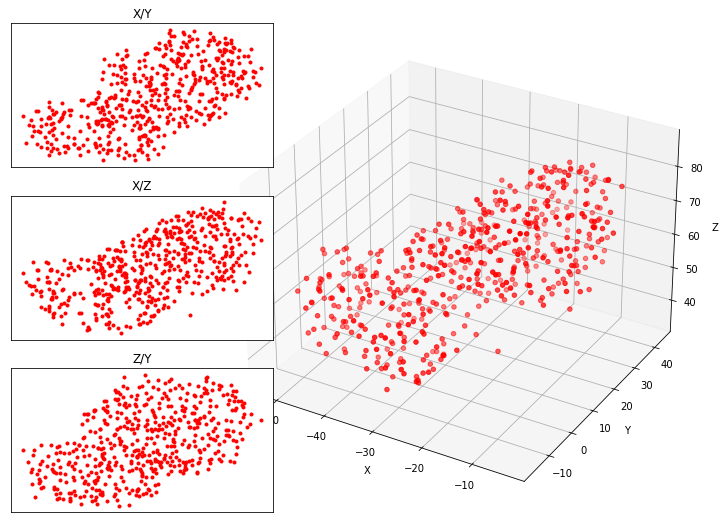

In [47]:
import matplotlib.pyplot as plt

#matplotlib 3d plot
fig = plt.figure(figsize=(16, 9))
ax3d = fig.add_subplot(111, projection='3d')
ax_xy = fig.add_subplot(331)
ax_xy.set_title('X/Y')
ax_xz = fig.add_subplot(334)
ax_xz.set_title('X/Z')
ax_zy = fig.add_subplot(337)
ax_zy.set_title('Z/Y')
color = {'A': 'r', 'B': 'g', 'C': 'b', 'E': '0.5', 'F': '0.75'}
zx, zy, zz = [], [], []
for chain in c19_6LZE.get_chains():
    xs, ys, zs = [], [], []
    for residue in chain.get_residues():
        ref_atom = next(residue.get_iterator())
        x, y, z = ref_atom.coord
        if ref_atom.element == 'ZN':
            zx.append(x)
            zy.append(y)
            zz.append(z)
            continue
        xs.append(x)
        ys.append(y)
        zs.append(z)
    ax3d.scatter(xs, ys, zs, color=color[chain.id])
    ax_xy.scatter(xs, ys, marker='.', color=color[chain.id])
    ax_xz.scatter(xs, zs, marker='.', color=color[chain.id])
    ax_zy.scatter(zs, ys, marker='.', color=color[chain.id])
ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')
ax3d.set_zlabel('Z')
ax3d.scatter(zx, zy, zz, color='k', marker='v', s=300)
ax_xy.scatter(zx, zy, color='k', marker='v', s=80)
ax_xz.scatter(zx, zz, color='k', marker='v', s=80)
ax_zy.scatter(zz, zy, color='k', marker='v', s=80)
for ax in [ax_xy, ax_xz, ax_zy]:
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)